# Credit Card Fraud Detection

Sutirtha Mukherjee \
16-11-2023

## Contents
- [Project Overview](#project-overview)
- [Importing Libraries](#importing-libraries)
- [Load Data](#load-data)
- [Data Cleaning](#data-cleaning)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Data Preprocessing for Modelling](#data-preprocessing-for-modelling)
- [Machine Learning Models](#machine-learning-models)
- [Conclusions](#conclusions)

## Project overview <a id="project-overview"></a>

In this machine learning (ML) project, our objective is to develop robust models for the detection of fraudulent credit card transactions. We will utilize a dataset containing transaction information and employ various ML algorithms, including Logistic Regression, Decision Trees, and Random Forests, to classify transactions into either fraudulent or legitimate categories.

### About the Dataset
We have access to a simulated credit card transaction dataset containing legitimate and fraudulent transactions over a span of two years, from 2019 to 2020. This dataset includes transactions made by 1000 customers with a diverse group of 800 merchants. Notably, the dataset exhibits severe class imbalance in terms of target classes. The dataset was sourced from the following Kaggle link: https://www.kaggle.com/datasets/kartik2112/fraud-detection  

## Importing Libraries <a id="importing-libraries"></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate,StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.dummy import DummyClassifier

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score,roc_curve,make_scorer,auc,PrecisionRecallDisplay,precision_recall_curve


from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

## Load Data <a id="load-data"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data for training ML models

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/CodSoftInternship/CreditCardFraud/fraudTrain.csv",index_col=0)

In [ ]:
pd.options.display.max_columns=50
pd.options.display.max_rows=100

In [ ]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Data for testing ML models

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/CodSoftInternship/CreditCardFraud/fraudTest.csv",index_col=0)
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Data Cleaning <a id="data-cleaning"></a>

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
train_data.isnull().sum().sum()

0

In [ ]:
test_data.isnull().sum().sum()

0

- There are no missing values in any dataset.

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
test_data.duplicated().sum()

0

- There are no duplicated rows.

## Exploratory Data Analysis <a id="exploratory-data-analysis"></a>

### Summary Statistics

In [ ]:
num_columns = train_data.select_dtypes(include=np.number).columns
num_columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
train_data[num_columns].describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
cat_columns = train_data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [ ]:
train_data[cat_columns].describe()

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


### Visualization

#### The Target Imbalance

Legitimate cases are denoted by 0, and fraudulent ones are denoted by 1.

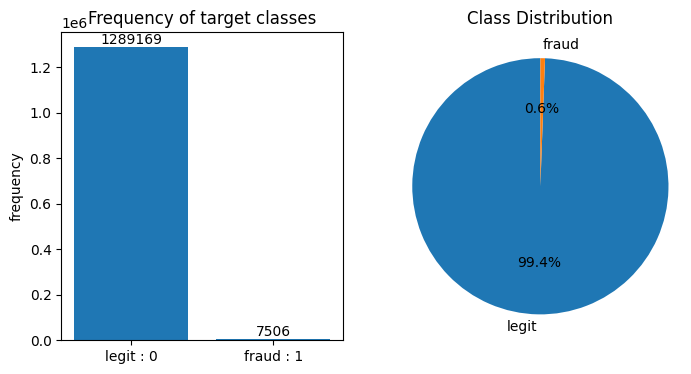

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.bar(['legit : 0','fraud : 1'],train_data["is_fraud"].value_counts())

for i, count in enumerate(train_data["is_fraud"].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title("Frequency of target classes")
plt.ylabel("frequency")

plt.subplot(1,2,2)
plt.pie(train_data["is_fraud"].value_counts(), labels=['legit','fraud'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

- The dataset exhibits a severe class imbalance, with the minority class having only 0.6% of the data.

#### Data distributions of numerical features

- "amt" feature:

In [ ]:
train_data["amt"].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

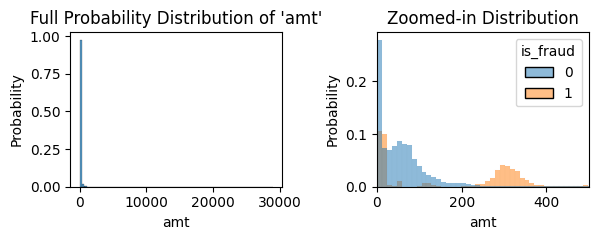

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

sns.histplot(data=train_data, x='amt', stat='probability', bins=100, ax=axes[0])
axes[0].set_title("Full Probability Distribution of 'amt'")

sns.histplot(data=train_data, x='amt', bins=2500, stat='probability', hue='is_fraud', common_norm=False, ax=axes[1])
axes[1].set_xlim(-1, 500)
axes[1].set_title("Zoomed-in Distribution")

plt.tight_layout()

plt.show()


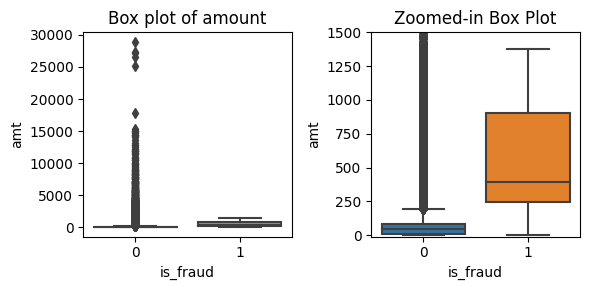

In [ ]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.boxplot(train_data[["amt",'is_fraud']],x='is_fraud',y="amt")
plt.title("Box plot of amount")

plt.subplot(1, 2, 2)
sns.boxplot(train_data[["amt",'is_fraud']],x='is_fraud',y="amt")
plt.ylim(-10,1500)
plt.title("Zoomed-in Box Plot")

plt.tight_layout()

plt.show()

Histograms and boxplots for the 'amt' feature strongly indicate that the feature might be useful in distinguishing between the two classes. The distribution shapes and the corresponding  medians of the two classes are significanlty different.

Notably, I am not removing any outlier here. While the plots reveal the presence of many outliers, removing them could result in the unintended removal of fraud cases, worsening data imbalance.

- "city_pop" feature :

In [ ]:
train_data["city_pop"].describe()

count    1.296675e+06
mean     8.882444e+04
std      3.019564e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64

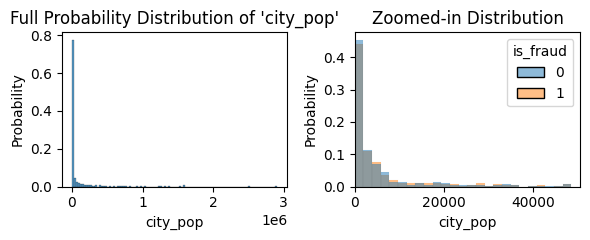

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

sns.histplot(data=train_data, x='city_pop', stat='probability', bins=100, ax=axes[0])
axes[0].set_title("Full Probability Distribution of 'city_pop'")

sns.histplot(data=train_data, x='city_pop', bins=1500, stat='probability', hue='is_fraud', common_norm=False, ax=axes[1])
axes[1].set_xlim(-1, 50500)
axes[1].set_title("Zoomed-in Distribution")

plt.tight_layout()

plt.show()


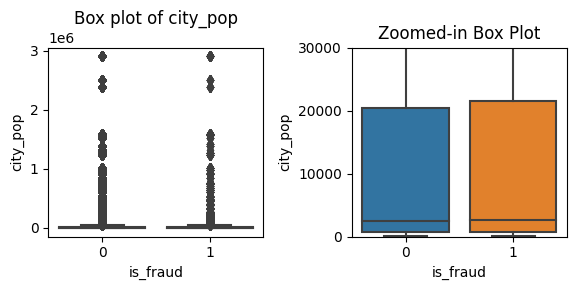

In [ ]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.boxplot(train_data[["city_pop",'is_fraud']],x='is_fraud',y="city_pop")
plt.title("Box plot of city_pop")

plt.subplot(1, 2, 2)
sns.boxplot(train_data[["city_pop",'is_fraud']],x='is_fraud',y="city_pop")
plt.ylim(-1,30000)
plt.title("Zoomed-in Box Plot")

plt.tight_layout()

plt.show()

Given the significant overlap in the distributions of this feature across different target classes and the similarity in their medians, it raises uncertainty about the feature's utility for classification.

- "unix_time" feature:

In [ ]:
train_data["unix_time"].describe()

count    1.296675e+06
mean     1.349244e+09
std      1.284128e+07
min      1.325376e+09
25%      1.338751e+09
50%      1.349250e+09
75%      1.359385e+09
max      1.371817e+09
Name: unix_time, dtype: float64

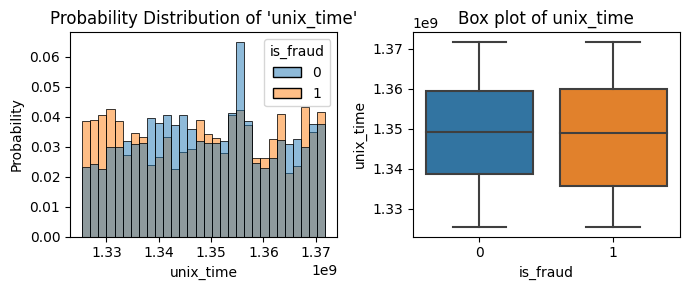

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

sns.histplot(data=train_data, x='unix_time', stat='probability',bins=30, hue='is_fraud', common_norm=False, ax=axes[0])
axes[0].set_title("Probability Distribution of 'unix_time'")

sns.boxplot(train_data[["unix_time",'is_fraud']],x='is_fraud',y="unix_time",ax=axes[1])
axes[1].set_title("Box plot of unix_time")

plt.tight_layout()

plt.show()


The 'unix_time' feature lacks a clear distinction between the two classes.

- Geospatial features :

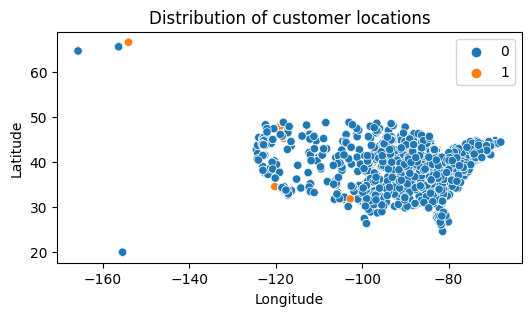

In [ ]:
plt.figure(figsize=(6, 3))

sns.scatterplot(train_data,x='long',y='lat',hue='is_fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Distribution of customer locations")
plt.legend()
plt.show()

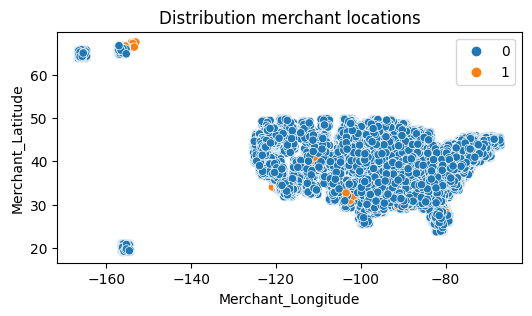

In [ ]:
plt.figure(figsize=(6, 3))
sns.scatterplot(train_data,x='merch_long',y='merch_lat',hue='is_fraud')
plt.xlabel('Merchant_Longitude')
plt.ylabel('Merchant_Latitude')
plt.title("Distribution merchant locations")
plt.legend()


The geospatial distribution of customer and merchant locations does not exhibit a clear distinction between legitimate and fraudulent transactions. We may consider exploring feature engineering on these attributes at a later stage.

#### Visualization for categorical features

In [ ]:
cat_count_legit = train_data[train_data.is_fraud==0]["category"].value_counts()
cat_count_fraud = train_data[train_data.is_fraud==1]["category"].value_counts()[cat_count_legit.keys()]

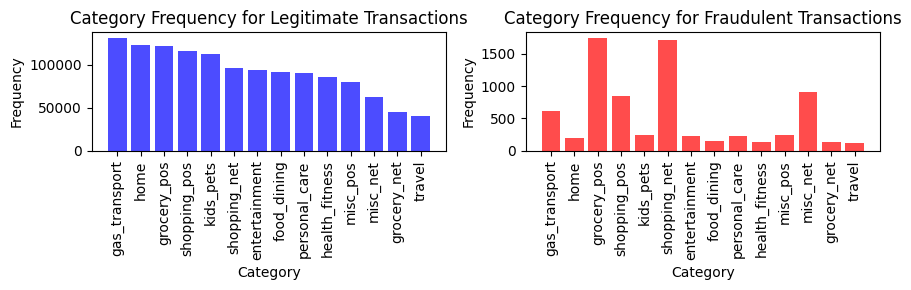

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.bar(cat_count_legit.index, cat_count_legit, alpha=0.7, color='b')
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Category")
plt.title("Category Frequency for Legitimate Transactions")

plt.subplot(1, 2, 2)
plt.bar(cat_count_fraud.index, cat_count_fraud, alpha=0.7, color='r')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Category Frequency for Fraudulent Transactions")

plt.tight_layout()

plt.show()

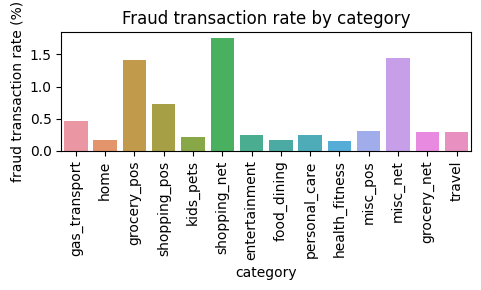

In [ ]:
plt.figure(figsize=(5,3))
def fraud_rate_by_category(feature):
    trnsctn_per_category = train_data[feature].value_counts()
    frauds_per_category = train_data[train_data.is_fraud==1][feature].value_counts()
    fraud_percentage = frauds_per_category/trnsctn_per_category*100
    fraud_percentage = fraud_percentage[cat_count_legit.keys()]

    sns.barplot(x=fraud_percentage.keys(),y=fraud_percentage)
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel("fraud transaction rate (%)")
    plt.title(f"Fraud transaction rate by "+feature)
    plt.tight_layout()
    plt.show()
fraud_rate_by_category("category")

The variations in the distribution of legitimate and fraudulent cases, as well as the fraud transaction rates among different categories, indicate that certain categories, such as "grocery_pos," "shopping_net," and "misc_net," are more prone to fraudulent transactions. This suggests that the "category" feature may play a significant role in target classification.

In [ ]:
train_data.gender = train_data.gender.map({"M":0,"F":1})
test_data.gender = test_data.gender.map({"M":0,"F":1})

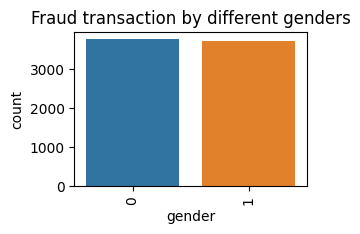

In [ ]:
plt.figure(figsize=(3, 2))
sns.countplot(train_data[train_data.is_fraud==1],x='gender')
plt.title("Fraud transaction by different genders")
plt.xticks(rotation=90)
plt.show()

Target classes are almost evenly distributed across genders.

### Feature engineering

- Feature engineering on the "dob" attribute :

In [ ]:
from datetime import datetime,date

In [ ]:
train_data.dob = pd.to_datetime(train_data.dob)

In [ ]:
train_data['age'] = 2023 - train_data.dob.dt.year

In [ ]:
test_data.dob = pd.to_datetime(test_data.dob)
test_data['age'] = 2023 - test_data.dob.dt.year

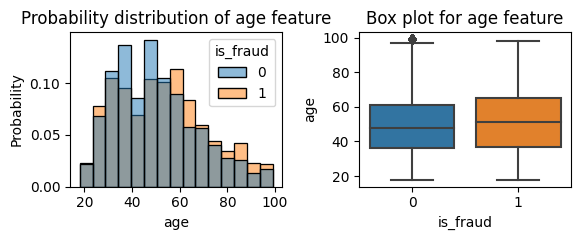

In [ ]:
plt.figure(figsize=(6, 2.5))

plt.subplot(1, 2, 1)
sns.histplot(train_data,x="age",stat="probability",common_norm=False,hue="is_fraud",bins=15)
plt.xlabel("age")
plt.title("Probability distribution of age feature")

plt.subplot(1, 2, 2)
sns.boxplot(train_data[["age",'is_fraud']],x='is_fraud',y="age")
plt.title("Box plot for age feature")

plt.tight_layout()

plt.show()

While the distributions for different target classes don't differ significantly, the variance in median values indicates that this feature might be useful for classification.

In [ ]:
# ##Grouping ages:

# age_bins = [0, 30, 50, 100]  # Define the age bins
# age_labels = ['Young', 'Middle-aged', 'Senior']

# train_data['age_group'] = pd.cut(train_data["age"], bins=age_bins, labels=age_labels)
# plt.figure(figsize=(7, 2))
# plt.subplot(1,2,1)
# sns.countplot(train_data[train_data.is_fraud==0],x='age')
# plt.title("For legitimate transactions")
# plt.subplot(1,2,2)
# sns.countplot(train_data[train_data.is_fraud==1],x='age')
# plt.title("For fraud transactions")
# plt.tight_layout()
# plt.show()

- Feature engineering on "trans_date_trans_time":

In [ ]:
train_data.trans_date_trans_time = pd.to_datetime(train_data.trans_date_trans_time)

In [ ]:
test_data.trans_date_trans_time = pd.to_datetime(test_data.trans_date_trans_time)

Here I am creating the hour, dates, weeks and months of transactions.

In [ ]:
train_data["trans_date"] = train_data.trans_date_trans_time.dt.date
train_data["trans_time"] = train_data.trans_date_trans_time.dt.time
train_data["trans_hour"] = train_data["trans_time"].apply(lambda x: x.hour)
train_data["trans_month"] = train_data.trans_date_trans_time.dt.month
train_data["trans_week"] = train_data.trans_date_trans_time.dt.isocalendar().week

In [ ]:
test_data["trans_date"] = test_data.trans_date_trans_time.dt.date
test_data["trans_time"] = test_data.trans_date_trans_time.dt.time
test_data["trans_hour"] = test_data["trans_time"].apply(lambda x: x.hour)
test_data["trans_month"] = test_data.trans_date_trans_time.dt.month
test_data["trans_week"] = test_data.trans_date_trans_time.dt.isocalendar().week

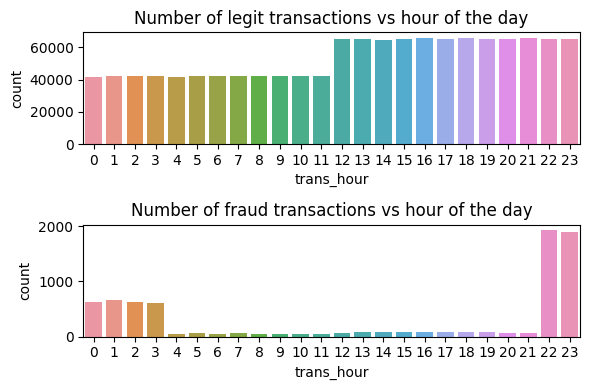

In [ ]:
plt.figure(figsize=(6, 4))
plt.subplot(2,1,1)
sns.countplot(train_data[train_data.is_fraud==0],x='trans_hour')
plt.title("Number of legit transactions vs hour of the day")

plt.subplot(2,1,2)
sns.countplot(train_data[train_data.is_fraud==1],x='trans_hour')
plt.title("Number of fraud transactions vs hour of the day")
plt.tight_layout()
plt.show()

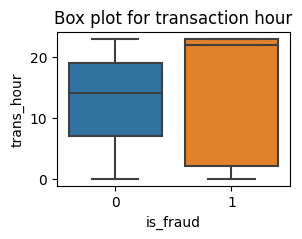

In [ ]:
plt.figure(figsize=(3, 2))
sns.boxplot(train_data[["trans_hour",'is_fraud']],x='is_fraud',y="trans_hour")
plt.title("Box plot for transaction hour")
plt.show()

There is a significant difference in the distribution of 'trans_hour' for different target classes. Fraudulent transactions mostly occur during nighttime hours. Therefore, the transaction hour is an important feature for classification.

- Total transactions per card :

In [ ]:
len(train_data.cc_num.unique()) #There are total 983 cards

983

In [ ]:
# Here we group by cards, and then compute total transaction per card

In [ ]:
train_data['card_trans_tot'] = train_data.groupby("cc_num")['trans_date_trans_time'].transform(lambda x:x.count())

In [ ]:
test_data['card_trans_tot'] = test_data.groupby("cc_num")['trans_date_trans_time'].transform(lambda x:x.count())

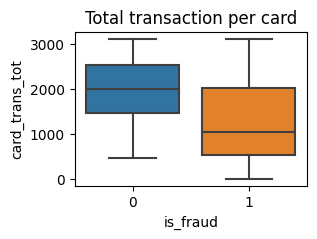

In [ ]:
plt.figure(figsize=(3, 2))
sns.boxplot(train_data[["card_trans_tot",'is_fraud']],x='is_fraud',y="card_trans_tot")
plt.title("Total transaction per card")
plt.show()

The boxplot suggests that the 'card_trans_tot' feature, which represents the total transactions per card, could be valuable for classification.

In [ ]:
train_data['card_trans_by_date'] = train_data.groupby(["cc_num","trans_date"])['trans_date_trans_time'].transform(lambda x:x.count())

In [ ]:
test_data['card_trans_by_date'] = test_data.groupby(["cc_num","trans_date"])['trans_date_trans_time'].transform(lambda x:x.count())

- In the context of a specific transaction, the 'card_trans_by_date' feature denotes the number of transactions conducted with the corresponding card on that particular day.

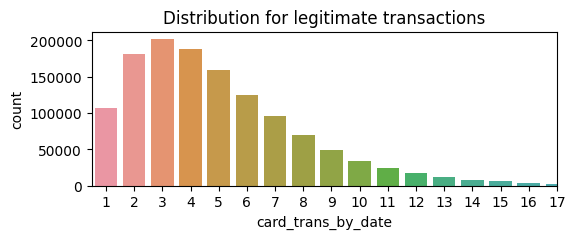

In [ ]:
plt.figure(figsize=(6, 2))
sns.countplot(train_data[train_data.is_fraud==0],x='card_trans_by_date')
plt.title("Distribution for legitimate transactions")
plt.xlim(-0.5,16)
plt.show()

Text(0.5, 1.0, 'Distribution for fraud transactions')

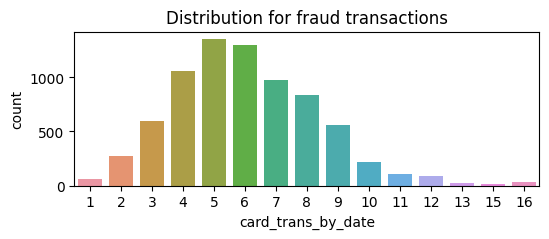

In [ ]:
plt.figure(figsize=(6, 2))
sns.countplot(train_data[train_data.is_fraud==1],x='card_trans_by_date')
plt.title("Distribution for fraud transactions")

(0.0, 15.0)

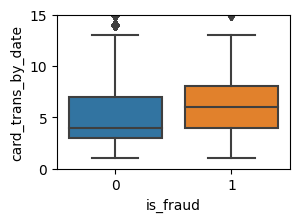

In [ ]:
plt.figure(figsize=(3, 2))
sns.boxplot(train_data[["card_trans_by_date",'is_fraud']],x='is_fraud',y="card_trans_by_date")
plt.ylim(0,15)

The distributions of the 'card_trans_by_date' feature indicates that the feature may have some potential to differentiate target classes.

- Similar to the 'card_trans_by_date' feature, I have generated two additional features, one indicating the number of transactions conducted within a specific week and the other indicating the number of transactions conducted within a specific month for a given card as follows :

In [ ]:
train_data['card_trans_by_month'] = train_data.groupby(["cc_num","trans_month"])['trans_date_trans_time'].transform(lambda x:x.count())

In [ ]:
test_data['card_trans_by_month'] = test_data.groupby(["cc_num","trans_month"])['trans_date_trans_time'].transform(lambda x:x.count())

<Axes: xlabel='is_fraud', ylabel='card_trans_by_month'>

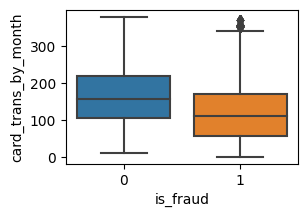

In [ ]:
plt.figure(figsize=(3, 2))
sns.boxplot(train_data[["card_trans_by_month",'is_fraud']],x='is_fraud',y="card_trans_by_month")
#plt.ylim(0,15)

In [ ]:
train_data['card_trans_by_week'] = train_data.groupby(["cc_num","trans_week"])['trans_date_trans_time'].transform(lambda x:x.count())

In [ ]:
test_data['card_trans_by_week'] = test_data.groupby(["cc_num","trans_week"])['trans_date_trans_time'].transform(lambda x:x.count())

(0.0, 100.0)

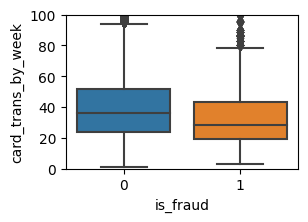

In [ ]:
plt.figure(figsize=(3, 2))
sns.boxplot(train_data[["card_trans_by_week",'is_fraud']],x='is_fraud',y="card_trans_by_week")
plt.ylim(0,100)

The 'card_trans_by_week' and 'card_trans_by_month' features also look promising. However, they exhibit a high correlation with each other, as we will observe shortly. Consequently, a choice needs to be made between them.




In [ ]:
## Although, I constructed the following feature, it was not very helpful, thus I am commenting it out.
# ## Distance between merchant and customer
# def haversine_distance(lat1, lon1, lat2, lon2):
#     # Radius of the Earth in kilometers
#     R = 6371

#     # Convert latitude and longitude from degrees to radians
#     lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

#     # Haversine formula
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1
#     a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
#     c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
#     distance = R * c

#     return distance

# train_data["merch_distance"] =  train_data.apply(lambda row:haversine_distance(row["lat"],row["long"],row["merch_lat"],row["merch_long"]),axis=1)

I am not using the remaining features because I found them either irrelevant for this classification problem or difficult to use effectively.



### Correlation between features

In [ ]:
train_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'trans_date', 'trans_time',
       'trans_hour', 'trans_month', 'trans_week', 'card_trans_tot',
       'card_trans_by_date', 'card_trans_by_month', 'card_trans_by_week'],
      dtype='object')

In [ ]:
correlations = train_data[['is_fraud','amt', 'lat', 'long','merch_lat','merch_long','city_pop', 'unix_time',
                           'trans_hour','trans_date','trans_month',
         'card_trans_tot','card_trans_by_date','card_trans_by_week',
       'card_trans_by_month', 'age']].corr(numeric_only=True)


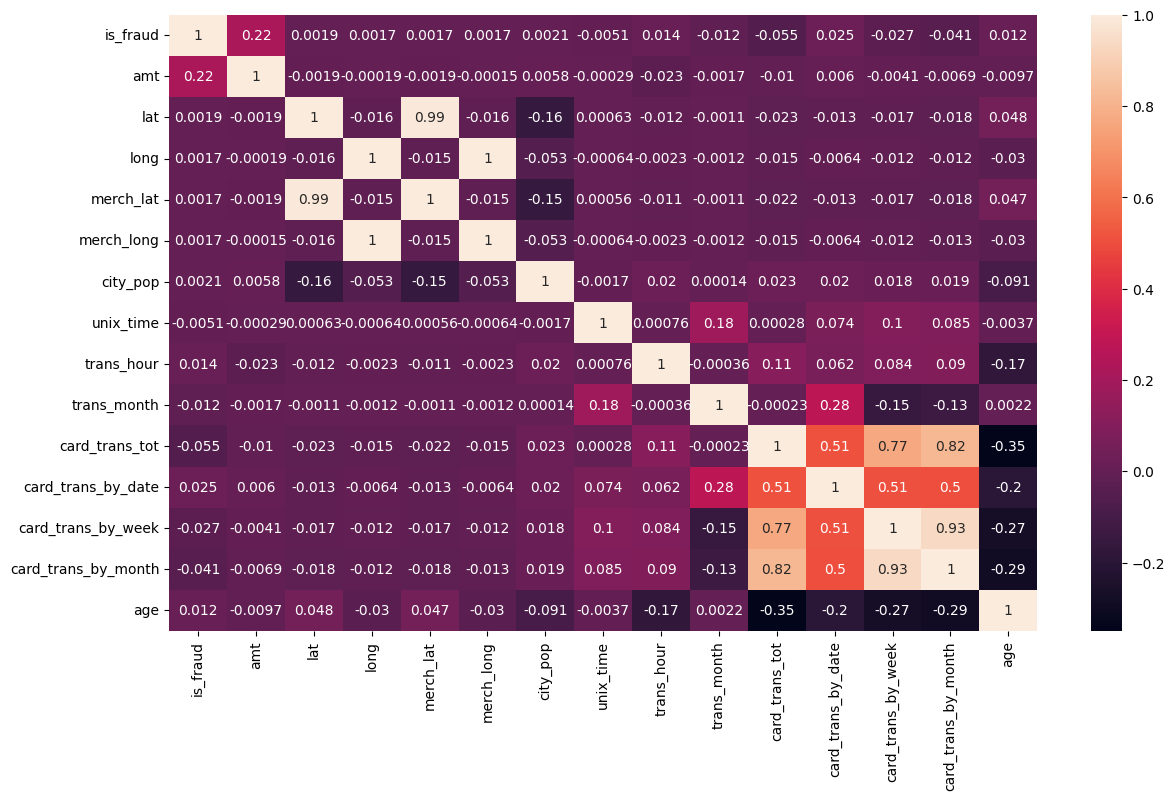

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(correlations,annot=True)
plt.show()

I am dropping 'merch_lat' and 'merch_long' due to their strong correlation with 'lat' and 'long', respectively. Considering that 'card_trans_by_date', 'card_trans_by_week,' and 'card_trans_by_month' have substantial correlations with one another, I have chosen only the first one.

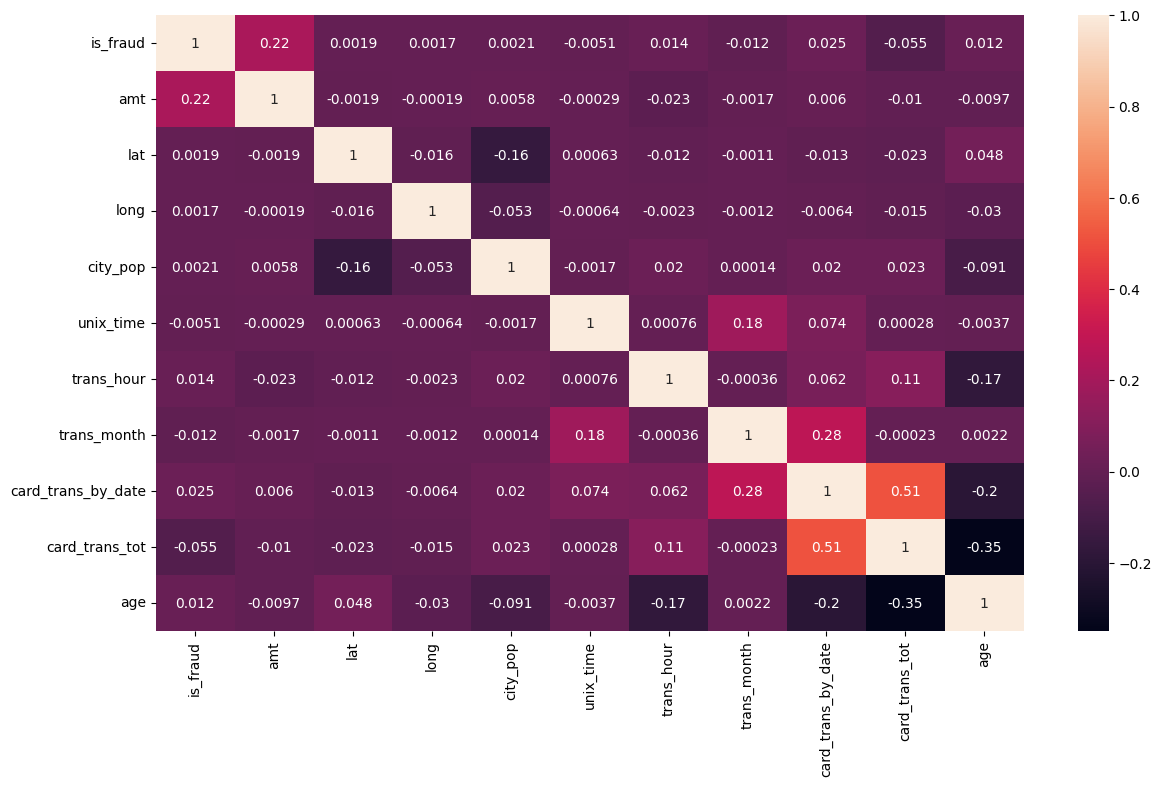

In [ ]:
correlations = train_data[ ['is_fraud','amt', 'lat', 'long', 'city_pop', 'unix_time',
                 'trans_hour', 'trans_month','card_trans_by_date',
                 'card_trans_tot','age']].corr(numeric_only=True)
plt.figure(figsize=(14, 8))
sns.heatmap(correlations,annot=True)
plt.show()

## Data Preprocessing for Modelling  <a id="data-preprocessing-for-modelling"></a>

In [ ]:
final_num_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time',
                 'trans_hour', 'trans_month','card_trans_by_date',
                 'card_trans_tot','age']
final_cat_columns = ['category',"gender"]
final_columns=final_num_columns+final_cat_columns

- Seperating input features and target labels :

In [ ]:
X_train = train_data[final_columns]
y_train = train_data["is_fraud"]

In [ ]:
X_train.shape, y_train.shape

((1296675, 12), (1296675,))

In [ ]:
X_test = test_data[final_columns]
y_test = test_data["is_fraud"]

In [ ]:
X_test.shape, y_test.shape

((555719, 12), (555719,))

In [ ]:
print("ratio of minority samples and majority samples",round(y_train.value_counts()[1]/y_train.value_counts()[0],4))

ratio of minority samples and majority samples 0.0058


### Scaling and Encoding

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),final_num_columns),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(),final_cat_columns)    # Apply OneHotEncoder to categorical features
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
transformed_feature_names = []
transformed_feature_names.extend(final_num_columns)

encoder = preprocessor.named_transformers_['cat']
transformed_feature_names.extend(encoder.get_feature_names_out())

X_train = pd.DataFrame(X_train, columns=transformed_feature_names)
X_test = pd.DataFrame(X_test, columns=transformed_feature_names)

In [ ]:
X_train.head()

,amt,lat,long,city_pop,unix_time,trans_hour,trans_month,card_trans_by_date,card_trans_tot,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_0,gender_1
0,-0.407826,-0.484420,0.657620,-0.282589,-1.858664,-1.878145,-1.504564,-0.625294,0.281849,-0.848322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.230039,2.039120,-2.033870,-0.293670,-1.858662,-1.878145,-1.504564,1.565302,1.631335,-0.272898,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.934149,0.717754,-1.601537,-0.280406,-1.858662,-1.878145,-1.504564,-1.251179,-1.772008,0.647781,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.158132,1.515617,-1.590766,-0.287742,-1.858660,-1.878145,-1.504564,-0.938237,-1.785476,0.360069,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.177094,-0.023035,0.782279,-0.293835,-1.858651,-1.878145,-1.504564,-0.312352,0.267035,-0.733237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Sampling

In [ ]:
#!pip install -U imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# sampler = RandomOverSampler(sampling_strategy='auto',random_state=42)
# X_train_tfidf,y_train = sampler.fit_resample(X_train_tfidf,y_train)

In [ ]:
# smote = SMOTE(sampling_strategy=0.01, random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
print("ratio of minority samples and majority samples",round(y_train.value_counts()[1]/y_train.value_counts()[0],4))

ratio of minority samples and majority samples 0.0058


In [ ]:
sampler = RandomUnderSampler(sampling_strategy=0.05,random_state=42)
X_train,y_train = sampler.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    150120
1      7506
Name: is_fraud, dtype: int64

After evaluating various sampling strategies, I have chosen to implement random undersampling with a minority class ratio of 0.05 in this project. This undersampling is helpful in two ways: making this project manageable with available computing resources and also in producing a better ML model. Here, I am presenting the cross-validation scores for different sampling strategies obtained with the top-performing model, XGBoost.


In [ ]:
print("Cross validation scores for different sampling strategies :\n")
dict1 = {'Sampling_strategy': ["No sampling","Random under, ratio=0.01","Random under, ratio=0.05",
                      "Random under, ratio=0.1","Random under, ratio=0.2"],
         'Mean_ROC_AUC_score': [0.965,0.980,0.986,0.984,0.981],
         "Standard_deviation": [0.034,0.001,0.001,0.005,0.013]}
pd.DataFrame(dict1)

Cross validation scores for different sampling strategies :



,Sampling_strategy,Mean_ROC_AUC_score,Standard_deviation
0,No sampling,0.965,0.034
1,"Random under, ratio=0.01",0.980,0.001
2,"Random under, ratio=0.05",0.986,0.001
3,"Random under, ratio=0.1",0.984,0.005
4,"Random under, ratio=0.2",0.981,0.013


## Machine Learning Models <a id="machine-learning-models"></a>

This is a supervised classification problem. Our approach involves constructing machine learning models with fine-tuned hyperparameters to achieve an optimal balance across various evaluation metrics, including the f1-score, Precision, Recall, ROC AUC score, accuracy, and others.

It is important to note that 'accuracy' may not be a reliable measure for imbalanced datasets, where one class significantly outnumbers the other. The choice of metrics should depend on the costs associated with false positives and false negatives. 'Precision' becomes crucial when the cost of false positives is high, while 'Recall' is essential when false negatives carry significant consequences.

In scenarios where cost information is unavailable, optimizing the f1-score or ROC AUC score, which considers both false positives and false negatives, can be a wise choice for hyperparameter tuning.


- Function for Computing Different Metrics :

In [ ]:
plt.rcParams["figure.figsize"] = (5,3)
def evaluate_metrics(model):

    y_train_pred = model.predict(X_train)
    y_train_scores = model.predict_proba(X_train)[:, 1]

    y_test_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]

    print(f"Train accuracy : {accuracy_score(y_train,y_train_pred):.2f}")
    print(f"Test accuracy : {accuracy_score(y_test,y_test_pred):.2f}\n")

    print(f"Train macro f1 score : {f1_score(y_train,y_train_pred,average='macro'):.2f}")
    print(f"Test macro f1 score : {f1_score(y_test,y_test_pred,average='macro'):.2f}\n")

    print(f"Train ROC AUC score : {roc_auc_score(y_train, y_train_scores):.2f}")
    print(f"Test ROC AUC score : {roc_auc_score(y_test, y_test_scores):.2f}\n")

    #For test data only

    print("\nClassification report for test data:\n")
    print(classification_report(y_test,y_test_pred))
    print("\nConfusion matrix for test data:")
    dsp = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, display_labels=model.classes_)#,normalize='true',values_format=".0%")
    plt.xticks(rotation=90)
    plt.show()

    print()

    fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)

    roc_auc = roc_auc_score(y_test, y_test_scores)

    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--',label="Random classifier's ROC Curve")
    plt.xlim([-0.001, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print("ROC AUC for test data :")
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

### Baseline Model using DummyClassifier

In [ ]:
hyp_params = {"strategy" : ["most_frequent", "prior", "stratified", "uniform"]}

#For best result
hyp_params = {"strategy" : ["stratified"]}

stratified_cv = StratifiedKFold(n_splits=5)
model = GridSearchCV(DummyClassifier(random_state = 42),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=-1,verbose=1,scoring="roc_auc")
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DummyClassifier(random_state=42), n_jobs=-1,
             param_grid={'strategy': ['stratified']}, scoring='roc_auc',
             verbose=1)

In [ ]:
print("Cross validation Roc_Auc score for the best model:\n")
print(f"Mean score: {model.cv_results_['mean_test_score']}")
print(f"Standard deviation: {model.cv_results_['std_test_score']}")

Cross validation Roc_Auc score for the best model:

Mean score: [0.50300093]
Standard deviation: [4.35573384e-07]


Train accuracy : 0.91
Test accuracy : 0.95

Train macro f1 score : 0.50
Test macro f1 score : 0.49

Train ROC AUC score : 0.50
Test ROC AUC score : 0.50


Classification report for test data:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.00      0.05      0.01      2145

    accuracy                           0.95    555719
   macro avg       0.50      0.50      0.49    555719
weighted avg       0.99      0.95      0.97    555719


Confusion matrix for test data:


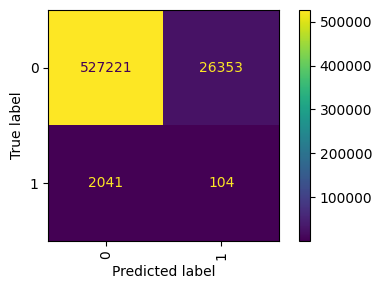


ROC AUC for test data :


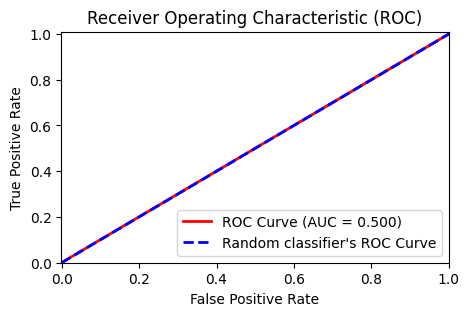

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified",random_state = 42)
dummy_clf.fit(X_train,y_train)

evaluate_metrics(dummy_clf)

This results clearly show that high accuracy can be very misleading when dealing with imbalanced dataset. Here, the dummy classifier, which essentially predicts legitimate transactions more than 95% of the time, still achieves very high accuracy. However, the model fails to effectively detect the minority class, i.e. the fraud transactions, as shown by the low f1 and ROC AUC score. This emphasizes the importance of choosing the right evaluation metrics for classifying imbalanced datasets.  

### Logistic Regression

#### Hyperparameter Tuning

We are utilizing Grid Search Cross-validation to fine-tune the hyperparameters of our machine learning models. Grid Search allows us to systematically explore various combinations of hyperparameters to optimize the model's performance.



In this project, I chose the ROC AUC (Receiver Operating Characteristic Area Under the Curve) as the primary metric for grid search cross-validation scoring. While I also considered the f1-score, the set of validation scores exhibited high variance, introducing ambiguity in the selection of the optimal hyperparameter set.  

In [ ]:
#Finding best hyper parameters using grid search cross-validation

hyp_params = {"penalty":['l1','l2'],
              "C":[0.1,1.0],
              "solver":['liblinear','lbfgs']
             }

##following set of hyperparameter produces the best result
hyp_params = {"penalty":['l2'],"C":[1.0],"solver":['lbfgs']}

stratified_cv = StratifiedKFold(n_splits=5)
log_reg = LogisticRegression(random_state=42,max_iter=10000,class_weight="balanced")
model = GridSearchCV(log_reg,param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="roc_auc")

In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42),
             n_jobs=3,
             param_grid={'C': [1.0], 'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='roc_auc', verbose=1)

In [ ]:
model.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

- Cross Validation scores :

In [ ]:
# print("Cross validation score, i.e. Roc_Auc, for the best model:\n")
# print(f"Mean score: {model.cv_results_['mean_test_score']}")
# print(f"Standard deviation: {model.cv_results_['std_test_score']}")

In [ ]:
def cv_scores(best_model):
  print("Cross validation scores of the model with best hyperparameters:\n")
  scoring = {"roc_auc":"roc_auc",'macro_f1': 'f1_macro',"accuracy":'accuracy'}
  stratified_cv = StratifiedKFold(n_splits=5)
  results = cross_validate(best_model, X_train, y_train, cv=stratified_cv, scoring=scoring)
  print(f"roc_auc  : mean = {round(results['test_roc_auc'].mean(),3)}, std deviation = {round(results['test_roc_auc'].std(),3)}")
  print(f"macro f1 : mean = {round(results['test_macro_f1'].mean(),3)}, std deviation = {round(results['test_macro_f1'].std(),3)}")
  print(f"accuracy : mean = {round(results['test_accuracy'].mean(),3)}, std deviation = {round(results['test_accuracy'].std(),3)}")

In [ ]:
best_model = LogisticRegression(C=1.0,penalty='l2',solver='lbfgs',random_state=42,max_iter=10000,class_weight="balanced")
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

roc_auc  : mean = 0.914, std deviation = 0.007
macro f1 : mean = 0.687, std deviation = 0.006
accuracy : mean = 0.901, std deviation = 0.002


#### Evaluation Metrics

In [ ]:
log_reg_final = LogisticRegression(C=1.0,penalty='l2',solver='lbfgs',random_state=42,max_iter=10000,class_weight="balanced")

log_reg_final.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

Train accuracy : 0.90
Test accuracy : 0.76

Train macro f1 score : 0.70
Test macro f1 score : 0.45

Train ROC AUC score : 0.94
Test ROC AUC score : 0.92


Classification report for test data:

              precision    recall  f1-score   support

           0       1.00      0.76      0.86    553574
           1       0.01      0.86      0.03      2145

    accuracy                           0.76    555719
   macro avg       0.51      0.81      0.45    555719
weighted avg       1.00      0.76      0.86    555719


Confusion matrix for test data:


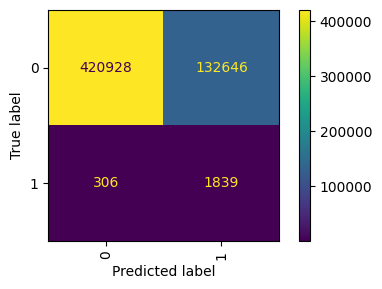


ROC AUC for test data :


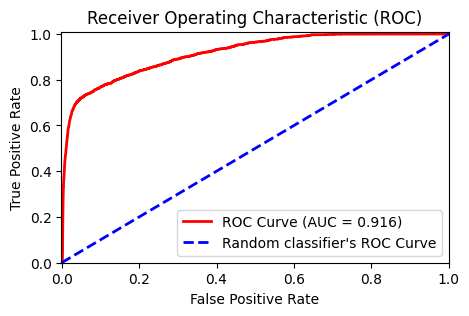

In [ ]:
evaluate_metrics(log_reg_final)

### Decision Tree Classifier

#### Hyperparameter Tuning

In [ ]:
hyp_params = {    "max_depth":[20,50,None],
                  "min_samples_split":[10,800],
                  "min_samples_leaf":[10,100]
              }
hyp_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30] }

##following set of hyperparameter produces the best result

hyp_params = {'max_depth': [10], 'max_features': ['log2'], 'max_leaf_nodes': [None],
              'min_samples_leaf':[2], 'min_samples_split': [2]}
stratified_cv = StratifiedKFold(n_splits=5)

model = GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="roc_auc")


In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [10], 'max_features': ['log2'],
                         'max_leaf_nodes': [None], 'min_samples_leaf': [2],
                         'min_samples_split': [2]},
             scoring='roc_auc', verbose=1)

In [ ]:
model.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
model.best_score_

0.8115252975711975

- Cross validation scores :

In [ ]:
# print("Cross validation score, i.e. Roc_Auc, for the best model:\n")
# print(f"Mean score: {model.cv_results_['mean_test_score']}")
# print(f"Standard deviation: {model.cv_results_['std_test_score']}")

In [ ]:
best_model = DecisionTreeClassifier(max_depth=10,max_features='log2',max_leaf_nodes=None,
                                             min_samples_leaf=2,min_samples_split=2,random_state=42,
                                             class_weight='balanced')
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

roc_auc  : mean = 0.812, std deviation = 0.117
macro f1 : mean = 0.709, std deviation = 0.066
accuracy : mean = 0.919, std deviation = 0.02


#### Evaluation Metrics

In [ ]:
decision_tree_final = best_model

decision_tree_final.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_leaf=2,
                       random_state=42)

Train accuracy : 0.95
Test accuracy : 0.81

Train macro f1 score : 0.80
Test macro f1 score : 0.47

Train ROC AUC score : 0.98
Test ROC AUC score : 0.87


Classification report for test data:

              precision    recall  f1-score   support

           0       1.00      0.81      0.90    553574
           1       0.02      0.90      0.04      2145

    accuracy                           0.81    555719
   macro avg       0.51      0.85      0.47    555719
weighted avg       1.00      0.81      0.89    555719


Confusion matrix for test data:


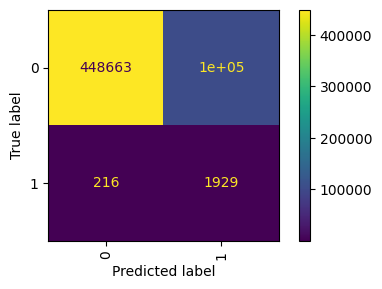


ROC AUC for test data :


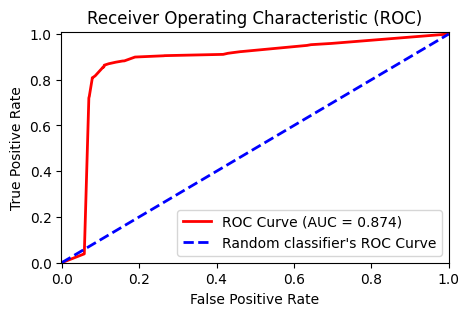

In [ ]:
evaluate_metrics(decision_tree_final)

### Random Forest Classifier

#### Hyperparameter Tuning

In [ ]:
hyp_params = {"n_estimators":[100,200],
                  "max_depth":[50,100,None],
                  "min_samples_split":[5,10,100]
              }

##following set of hyperparameter produces the best result
hyp_params = {'max_depth': [100], 'min_samples_split': [5], 'n_estimators': [200]}

stratified_cv = StratifiedKFold(n_splits=5)

model = GridSearchCV(RandomForestClassifier(random_state=42,class_weight='balanced'),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="roc_auc")

In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [100], 'min_samples_split': [5],
                         'n_estimators': [200]},
             scoring='roc_auc', verbose=1)

In [ ]:
model.best_params_

{'max_depth': 100, 'min_samples_split': 5, 'n_estimators': 200}

- Cross validation scores :

In [ ]:
best_model = RandomForestClassifier(max_depth=100,min_samples_split=5,
                                              n_estimators=200, random_state=42,class_weight='balanced')
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

roc_auc  : mean = 0.982, std deviation = 0.007
macro f1 : mean = 0.697, std deviation = 0.172
accuracy : mean = 0.967, std deviation = 0.013


#### Evaluation Metrics

In [ ]:
random_forest_final = best_model
random_forest_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=100,
                       min_samples_split=5, n_estimators=200, random_state=42)

Train accuracy : 1.00
Test accuracy : 0.96

Train macro f1 score : 1.00
Test macro f1 score : 0.57

Train ROC AUC score : 1.00
Test ROC AUC score : 0.98


Classification report for test data:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.09      0.87      0.16      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.92      0.57    555719
weighted avg       1.00      0.96      0.98    555719


Confusion matrix for test data:


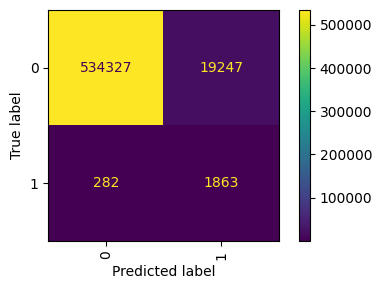


ROC AUC for test data :


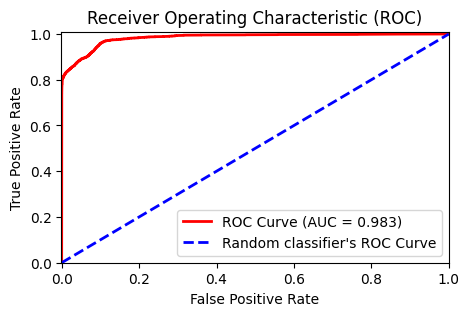

In [ ]:
evaluate_metrics(random_forest_final)

It's worth noting that precision is a very sensitive metric in the case of a highly imbalanced dataset. Due to the significantly larger number of legitimate cases compared to fraud ones, classifying only 3.5% of legit transactions as false positives has reduced the precision to 0.09.

### XGBoost classifier :

#### Hyperparameter Tuning

In [ ]:
class_weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
class_weight_ratio

20.0

In [ ]:

hyp_params = {'learning_rate': [0.01, 0.1,0.3],
    'max_depth': [3, 4],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 2],
    'subsample': [0.8,  1.0],
    'scale_pos_weight':[1,10,class_weight_ratio]
              }

##default
#hyp_params = {'learning_rate': [0.1], 'max_depth': [3], 'min_child_weight': [1], 'n_estimators': [100], 'subsample': [1]}
##following set of hyperparameter produces the best result
hyp_params = {'learning_rate': [0.01],'max_depth': [4],'min_child_weight': [2],'n_estimators': [200],'subsample': [0.8],
              'scale_pos_weight':[1]}

stratified_cv = StratifiedKFold(n_splits=5)

model = GridSearchCV(XGBClassifier(random_state=42),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=-1,verbose=1,scoring="roc_auc")

In [ ]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [4],
                         'min_child_weight': [2], 'n_estimators': [200],
                         'scale_pos_weight': [1], 'subsample': [0.8]},
             scoring='roc_auc', verbose=1)

In [ ]:
model.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 200,
 'scale_pos_weight': 1,
 'subsample': 0.8}

- Cross validation scores :

In [ ]:
best_model = XGBClassifier(learning_rate=0.01,max_depth= 4,min_child_weight= 2,
                           n_estimators= 200,subsample=0.8,scale_pos_weight=1,random_state=42)
cv_scores(best_model)

Cross validation scores of the model with best hyperparameters:

roc_auc  : mean = 0.986, std deviation = 0.001
macro f1 : mean = 0.837, std deviation = 0.103
accuracy : mean = 0.978, std deviation = 0.01


#### Evaluation Metrics

In [ ]:
xgb_final = best_model

In [ ]:
xgb_final.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Train accuracy : 0.99
Test accuracy : 1.00

Train macro f1 score : 0.93
Test macro f1 score : 0.78

Train ROC AUC score : 0.99
Test ROC AUC score : 0.98


Classification report for test data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.45      0.79      0.57      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.89      0.78    555719
weighted avg       1.00      1.00      1.00    555719


Confusion matrix for test data:


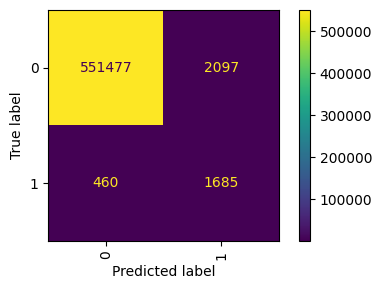


ROC AUC for test data :


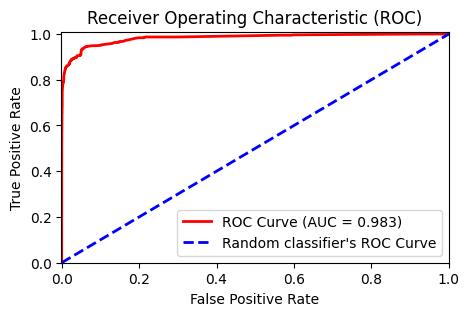

In [ ]:
evaluate_metrics(xgb_final)

#### Feature Importance

In [ ]:
feat_imp = pd.DataFrame(xgb_final.feature_importances_,index = X_train.columns.tolist())
feat_imp = feat_imp.sort_values(by=0,ascending=False)

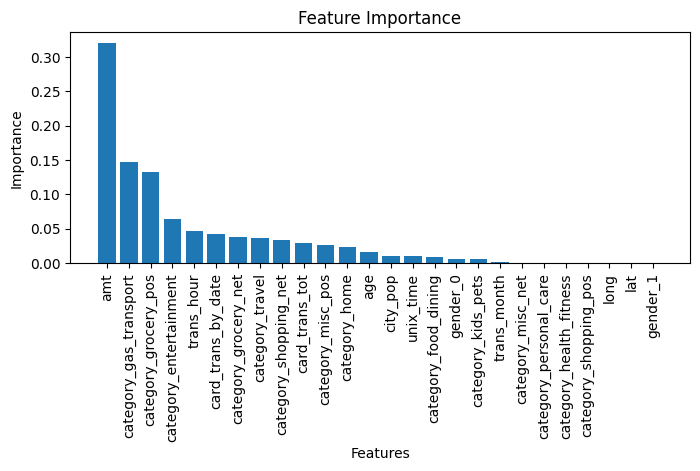

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(feat_imp.index, feat_imp[0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Comparing Performance of Different Models

In [ ]:
train_acc = []
test_acc = []
train_f1 = []
test_f1 = []
train_auc = []
test_auc = []
classifiers = [log_reg_final,decision_tree_final,random_forest_final,xgb_final]
for  model in classifiers:
    y_train_pred = model.predict(X_train)
    y_train_scores = model.predict_proba(X_train)[:, 1]

    y_test_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]

    train_acc.append(round(accuracy_score(y_train,y_train_pred),2))
    test_acc.append(round(accuracy_score(y_test,y_test_pred),2))

    train_f1.append(round(f1_score(y_train,y_train_pred,average='macro'),2))
    test_f1.append(round(f1_score(y_test,y_test_pred,average='macro'),2))

    train_auc.append(round(roc_auc_score(y_train, y_train_scores),3))
    test_auc.append(round(roc_auc_score(y_test, y_test_scores),3))

metrics = {"classifier":["Logistic regression","Decision tree","Random Forest","XGBoost"],
 "Train_accuracy":train_acc, "Test_accuracy":test_acc, "Train_f1_macro":train_f1, "Test_f1_macro":test_f1,
 "Train_ROC_AUC":train_auc,"Test_ROC_AUC":test_auc}


In [ ]:
pd.DataFrame(metrics)

,classifier,Train_accuracy,Test_accuracy,Train_f1_macro,Test_f1_macro,Train_ROC_AUC,Test_ROC_AUC
0,Logistic regression,0.90,0.76,0.70,0.45,0.938,0.916
1,Decision tree,0.95,0.81,0.80,0.47,0.979,0.874
2,Random Forest,1.00,0.96,1.00,0.57,1.000,0.983
3,XGBoost,0.99,1.00,0.93,0.78,0.989,0.983


The XGBoost classifier model showed the best overall performance in terms of accuracy, f1 score and ROC AUC score. Overfitting is observed across all models, particularly evident in the train and test f1 scores. Additionally, XGBoost exhibited a better balance in the bias-variance trade-off compared to the other models.

 Given the very large dimensions of the dataframes and the limitations of my computational resources, I couldn't perform a more thorough algorithm search or grid search, which could have improved the results.   

## Conclusions <a id="conclusions"></a>

- In this credit card fraud detection project, we evaluated the performance of four different machine learning classifier models: Logistic Regression, Decision Tree, Random Forest, and XGBoost. The significantly improved performance of all ML models compared to the baseline model provides a clear indication that machine learning techniques can be valuable in predicting credit card fraudulent cases based on the provided information.

- XGBoost emerged as the top-performing model, achieving the highest accuracy, f1 scores and ROC AUC score on test data. It showed a good balance between precision and recall and a very nice ROC curve, suggesting its effectiveness in identifying fraudulent transactions.

- The outcomes of this project emphasizes the importance of choosing appropriate evaluation metrics for a classfication tasks. When working with imbalanced dataset, accuracy alone is not a reliable indicator of performance. We should consider various other metrics like f1-score, presicion, recall, and ROC AUC score.

- As a potential future extension, the implementation of deep learning algorithms is likely to produce an even more effective model for this project.